In [52]:
import pandas as pd
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv('datasets/clean/interim_clean_dataset_2021-07-19.csv')
df['rural_urban_code'] = df['rural_urban_code'].astype('category')
df['urban_influence_code'] = df['urban_influence_code'].astype('category')
df['state'] = df['state'].astype('category')
df['division'] = df['division'].astype('category')
df['region'] = df['region'].astype('category')
df['vaccine_hesitant_category'] = df['vaccine_hesitant_category'].astype('category')

df.columns

Index(['fips', 'county_name', 'state', 'division', 'region',
       'vaccine_hesitant', 'vaccine_hesitant_strong',
       'vaccine_hesitant_category', 'social_vulnerability_index',
       'ethnicity_hispanic', 'ethnicity_native', 'ethnicity_asian',
       'ethnicity_black', 'ethnicity_hawaiian', 'ethnicity_white',
       'population', 'birth_rate', 'unemployment', 'rural_urban_code',
       'urban_influence_code', 'median_income_percent_state', 'median_income',
       'poverty', 'education_high_school_less', 'education_high_school_only',
       'education_degree_some', 'education_bachelors_degree', 'religion_total',
       'religion_evangelical', 'religion_mainline_protestant',
       'election_democrat_wins', 'election_republican_wins',
       'election_total_2008', 'election_dem_2008', 'election_gop_2008',
       'election_oth_2008', 'election_total_2012', 'election_dem_2012',
       'election_gop_2012', 'election_oth_2012', 'election_total_2016',
       'election_dem_2016', 'electio

## QQ Plots

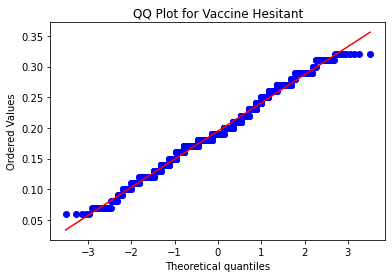

In [10]:
stats.probplot(x=df['vaccine_hesitant'], dist='norm', plot=plt)
plt.title('QQ Plot for Vaccine Hesitant')
plt.show()

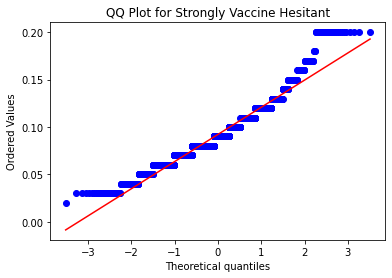

In [11]:
stats.probplot(x=df['vaccine_hesitant_strong'], dist='norm', plot=plt)
plt.title('QQ Plot for Strongly Vaccine Hesitant')
plt.show()

We do a QQ plot on our two dependent vaccine hesitant variables to determine if our data is normalized. The `vaccine_hesitant` graph is relatively normally distributed. However the `vaccine_hesitant_strong` graph is less so with both tails being above the expected values i.e. fat tailed. This suggests to us to use a Box-Cox Lambda transformation on them, or at least `vaccine_hesitant_strong`, to get normalized data to do our modelling on. 

## Box-Cox Lambda transformation

In [46]:
vaccine_hesitant_transformed, lambda_vaccine_hesitant = stats.boxcox(df['vaccine_hesitant'])
vaccine_hesitant_strong_transformed, lambda_vaccine_hesitant_strong = stats.boxcox(df['vaccine_hesitant_strong'])
df['vaccine_hesitant_transformed'] = vaccine_hesitant_transformed
df['vaccine_hesitant_strong_transformed'] = vaccine_hesitant_strong_transformed

lambda_vaccine_hesitant, lambda_vaccine_hesitant_strong

(0.8265990742746657, 0.3313582508560165)

Our Box-Cox transformation gives us lambda values of 0.8 and 0.3 for `vaccine_hesitant` and `vaccine_hesitant_strong` respectively. The former is close to 1, which means no transformation is required and it is normally distributed. The latter is much smaller than 1, so the transformation will apply a fractional exponent like square root to arrive at the transformed values.

## Linear Regression
### Non-Transformed Vaccine Hesitancy Models
#### Vaccine Hesitant

In [44]:
fitted_model_hesitant = sm.ols(formula='vaccine_hesitant ~ ethnicity_white + ethnicity_hispanic + ethnicity_black + ethnicity_asian + ethnicity_native + ethnicity_hawaiian + population + birth_rate + unemployment + rural_urban_code + urban_influence_code + median_income + education_high_school_only + education_bachelors_degree + religion_total + religion_evangelical + religion_mainline_protestant + election_democrat_wins + election_republican_wins + election_total_2008 + election_dem_2008 + election_gop_2008 + election_oth_2008 + election_total_2012 + election_dem_2012 + election_gop_2012 + election_oth_2012 + election_total_2016 + election_dem_2016 + election_gop_2016 + election_oth_2016 + election_gop_2020 + election_dem_2020', data=df).fit()
fitted_model_hesitant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       vaccine_hesitant   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     51.68
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:03:03   Log-Likelihood:                 5965.3
No. Observations:                3075   AIC:                        -1.184e+04
Df Residuals:                    3030   BIC:                        -1.157e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0149      0.005      2.819      0.005       0.005       0.025
rural_urban_code[T.2.0]          0.0022      0.002      1.471      0.141      -0.001       0.005
rural_urban_code[T.3.0]          0.0022      0.002      1.363      0.173      -0.001       0.005
rural_urban_code[T.4.0]          0.0008      0.003      0.245      0.806      -0.006       0.007
rural_urban_code[T.5.0]          0.0085      0.004      2.004      0.045       0.000       0.017
rural_urban_code[T.6.0]          0.0053      0.002      2.283      0.022       0.001       0.010
rural_urban_code[T.7.0]          0.0063      0.003      2.374      0.018       0.001       0.012
rural_urban_code[T.8.0]          0.0038      0.003      1.095      0.273      -0.003       0.011
rural_urban_code[T.9.0]          0.0102      0.003      3.405      0.001       0.004       0.016
urban_influence_code[T.2.0]      0.0044      0.002      2.667      0.008       0.001       0.008
urban_influence_code[T.3.0]      0.0058      0.003      1.733      0.083      -0.001       0.012
urban_influence_code[T.4.0]     -0.0092      0.003     -3.143      0.002      -0.015      -0.003
urban_influence_code[T.5.0]      0.0023      0.003      0.877      0.380      -0.003       0.007
urban_influence_code[T.6.0]   8.115e-05      0.002      0.033      0.974      -0.005       0.005
urban_influence_code[T.7.0]      0.0110      0.004      2.874      0.004       0.004       0.019
urban_influence_code[T.8.0]      0.0083      0.002      3.412      0.001       0.004       0.013
urban_influence_code[T.9.0]      0.0039      0.003      1.284      0.199      -0.002       0.010
urban_influence_code[T.10.0]     0.0058      0.003      1.791      0.073      -0.001       0.012
urban_influence_code[T.11.0]     0.0020      0.004      0.553      0.581      -0.005       0.009
urban_influence_code[T.12.0]     0.0052      0.004      1.447      0.148      -0.002       0.012
ethnicity_white                  0.0640      0.048      1.344      0.179      -0.029       0.157
ethnicity_hispanic               0.0033      0.047      0.069      0.945      -0.090       0.096
ethnicity_black                  0.1542      0.047      3.254      0.001       0.061       0.247
ethnicity_asian                 -0.0707      0.065     -1.087      0.277      -0.198       0.057
ethnicity_native                 0.1700      0.052      3.284      0.001       0.069       0.272
ethnicity_hawaiian               0.0010      0.228      0.004      0.996      -0.447       0.449
population                    1.977e-08    1.7e-08      1.160      0.246   -1.37e-08    5.32e-08
birth_rate                       0.3114      0.032      9.670      0.000       0.248       0.375
unemployment                    -0.2169      0.056     -3.871      0.000    



#### Strongly Vaccine Hesitant

In [51]:
model_fitted_hesitant_strong = sm.ols(formula='vaccine_hesitant_strong ~ ethnicity_white + ethnicity_hispanic + ethnicity_black + ethnicity_asian + ethnicity_native + ethnicity_hawaiian + population + birth_rate + unemployment + rural_urban_code + median_income + education_high_school_only + education_bachelors_degree + religion_total + religion_evangelical + religion_mainline_protestant + election_democrat_wins + election_republican_wins + election_total_2008 + election_dem_2008 + election_gop_2008 + election_oth_2008 + election_total_2012 + election_dem_2012 + election_gop_2012 + election_oth_2012 + election_total_2016 + election_dem_2016 + election_gop_2016 + election_oth_2016 + election_gop_2020 + election_dem_2020', data=df).fit()
fitted_hesitant_strong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     vaccine_hesitant_strong   R-squared:                       0.282
Model:                                 OLS   Adj. R-squared:                  0.275
Method:                      Least Squares   F-statistic:                     41.25
Date:                     Wed, 28 Jul 2021   Prob (F-statistic):          1.37e-194
Time:                             19:13:21   Log-Likelihood:                 7008.9
No. Observations:                     3075   AIC:                        -1.396e+04
Df Residuals:                         3045   BIC:                        -1.378e+04
Df Model:                               29                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0073      0.004      1.948      0.051   -4.65e-05       0.015
ethnicity_white                  0.0195      0.034      0.579      0.563      -0.047       0.086
ethnicity_hispanic              -0.0077      0.034     -0.231      0.818      -0.074       0.058
ethnicity_black                  0.0462      0.034      1.377      0.168      -0.020       0.112
ethnicity_asian                 -0.0620      0.046     -1.346      0.178      -0.152       0.028
ethnicity_native                 0.0817      0.037      2.230      0.026       0.010       0.154
ethnicity_hawaiian               0.0282      0.161      0.175      0.861      -0.288       0.344
population                    1.239e-08   1.21e-08      1.026      0.305   -1.13e-08    3.61e-08
birth_rate                       0.1513      0.023      6.710      0.000       0.107       0.195
unemployment                    -0.1183      0.040     -2.987      0.003      -0.196      -0.041
rural_urban_code                 0.0007      0.000      2.846      0.004       0.000       0.001
median_income                -2.878e-07   5.64e-08     -5.105      0.000   -3.98e-07   -1.77e-07
education_high_school_only       0.0255      0.012      2.121      0.034       0.002       0.049
education_bachelors_degree      -0.0367      0.011     -3.198      0.001      -0.059      -0.014
religion_total                5.723e-06   3.89e-06      1.470      0.142   -1.91e-06    1.34e-05
religion_evangelical           6.36e-06   4.27e-06      1.489      0.137   -2.01e-06    1.47e-05
religion_mainline_protestant  4.187e-06    6.3e-06      0.664      0.507   -8.17e-06    1.65e-05
election_democrat_wins           0.0134      0.007      1.792      0.073      -0.001       0.028
election_republican_wins         0.0157      0.007      2.103      0.036       0.001       0.030
election_total_2008           1.461e-08   1.53e-07      0.095      0.924   -2.86e-07    3.15e-07
election_dem_2008             2.402e-08   1.84e-07      0.131      0.896   -3.37e-07    3.85e-07
election_gop_2008            -8.732e-08   2.18e-07     -0.401      0.688   -5.14e-07     3.4e-07
election_oth_2008            -2.092e-06   1.35e-06     -1.548      0.122   -4.74e-06    5.57e-07
election_total_2012            7.44e-07   3.11e-07      2.392      0.017    1.34e-07    1.35e-06
election_dem_2012            -8.233e-07   3.46e-07     -2.381      0.017    -1.5e-06   -1.45e-07
election_gop_2012            -5.808e-07   3.39e-07     -1.712      0.087   -1.25e-06    8.42e-08
election_oth_2012             2.148e-06   9.38e-07      2.290      0.022    3.09e-07    3.99e-06
election_total_2016          -1.249e-07   8.34e-08     -1.498      0.134   -2.88e-07    3.86e-08
election_dem_2016    



### Box-Cox Transformed Models
#### Vaccine Hesitant

In [48]:
fitted_model_hesitant_transformed = sm.ols(formula='vaccine_hesitant_transformed ~ ethnicity_white + ethnicity_hispanic + ethnicity_black + ethnicity_asian + ethnicity_native + ethnicity_hawaiian + population + birth_rate + unemployment + rural_urban_code + urban_influence_code + median_income + education_high_school_only + education_bachelors_degree + religion_total + religion_evangelical + religion_mainline_protestant + election_democrat_wins + election_republican_wins + election_total_2008 + election_dem_2008 + election_gop_2008 + election_oth_2008 + election_total_2012 + election_dem_2012 + election_gop_2012 + election_oth_2012 + election_total_2016 + election_dem_2016 + election_gop_2016 + election_oth_2016 + election_gop_2020 + election_dem_2020', data=df).fit()
fitted_model_hesitant_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     vaccine_hesitant_transformed   R-squared:                       0.437
Model:                                      OLS   Adj. R-squared:                  0.429
Method:                           Least Squares   F-statistic:                     53.46
Date:                          Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                                  19:12:28   Log-Likelihood:                 5104.1
No. Observations:                          3075   AIC:                        -1.012e+04
Df Residuals:                              3030   BIC:                            -9847.
Df Model:                                    44                                         
Covariance Type:                      nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.1082      0.007    -15.489      0.000      -0.122      -0.095
rural_urban_code[T.2.0]          0.0030      0.002      1.523      0.128      -0.001       0.007
rural_urban_code[T.3.0]          0.0027      0.002      1.283      0.200      -0.001       0.007
rural_urban_code[T.4.0]          0.0009      0.004      0.199      0.842      -0.008       0.009
rural_urban_code[T.5.0]          0.0114      0.006      2.030      0.042       0.000       0.022
rural_urban_code[T.6.0]          0.0067      0.003      2.166      0.030       0.001       0.013
rural_urban_code[T.7.0]          0.0079      0.004      2.252      0.024       0.001       0.015
rural_urban_code[T.8.0]          0.0046      0.005      1.010      0.313      -0.004       0.014
rural_urban_code[T.9.0]          0.0129      0.004      3.235      0.001       0.005       0.021
urban_influence_code[T.2.0]      0.0058      0.002      2.637      0.008       0.001       0.010
urban_influence_code[T.3.0]      0.0076      0.004      1.728      0.084      -0.001       0.016
urban_influence_code[T.4.0]     -0.0123      0.004     -3.176      0.002      -0.020      -0.005
urban_influence_code[T.5.0]      0.0029      0.003      0.824      0.410      -0.004       0.010
urban_influence_code[T.6.0]   -7.22e-05      0.003     -0.022      0.982      -0.006       0.006
urban_influence_code[T.7.0]      0.0142      0.005      2.788      0.005       0.004       0.024
urban_influence_code[T.8.0]      0.0106      0.003      3.310      0.001       0.004       0.017
urban_influence_code[T.9.0]      0.0048      0.004      1.199      0.231      -0.003       0.013
urban_influence_code[T.10.0]     0.0077      0.004      1.796      0.073      -0.001       0.016
urban_influence_code[T.11.0]     0.0024      0.005      0.513      0.608      -0.007       0.012
urban_influence_code[T.12.0]     0.0067      0.005      1.419      0.156      -0.003       0.016
ethnicity_white                  0.0836      0.063      1.326      0.185      -0.040       0.207
ethnicity_hispanic               0.0047      0.063      0.075      0.940      -0.118       0.128
ethnicity_black                  0.2024      0.063      3.227      0.001       0.079       0.325
ethnicity_asian                 -0.1058      0.086     -1.230      0.219      -0.274       0.063
ethnicity_native                 0.2218      0.069      3.237      0.001       0.087       0.356
ethnicity_hawaiian              -0.0044      0.302     -0.015      0.988      -0.597       0.588
population                    2.741e-08   2.26e-08      1.215      0.224   -1.68e-08    7.16e-08
birth_rate                       0.4117      0.043      9.662  

#### Strongly Vaccine Hesitant

In [50]:
fitted_model_hesitant_strong_transformed = sm.ols(formula='vaccine_hesitant_strong_transformed ~ ethnicity_white + ethnicity_hispanic + ethnicity_black + ethnicity_asian + ethnicity_native + ethnicity_hawaiian + population + birth_rate + unemployment + rural_urban_code + urban_influence_code + median_income + education_high_school_only + education_bachelors_degree + religion_total + religion_evangelical + religion_mainline_protestant + election_democrat_wins + election_republican_wins + election_total_2008 + election_dem_2008 + election_gop_2008 + election_oth_2008 + election_total_2012 + election_dem_2012 + election_gop_2012 + election_oth_2012 + election_total_2016 + election_dem_2016 + election_gop_2016 + election_oth_2016 + election_gop_2020 + election_dem_2020', data=df).fit()
fitted_model_hesitant_strong_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     vaccine_hesitant_strong_transformed   R-squared:                       0.350
Model:                                             OLS   Adj. R-squared:                  0.341
Method:                                  Least Squares   F-statistic:                     37.15
Date:                                 Wed, 28 Jul 2021   Prob (F-statistic):          5.32e-247
Time:                                         19:13:10   Log-Likelihood:                 2278.6
No. Observations:                                 3075   AIC:                            -4467.
Df Residuals:                                     3030   BIC:                            -4196.
Df Model:                                           44                                         
Covariance Type:                             nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.2007      0.018    -11.458      0.000      -0.235      -0.166
rural_urban_code[T.2.0]          0.0094      0.005      1.870      0.062      -0.000       0.019
rural_urban_code[T.3.0]          0.0087      0.005      1.625      0.104      -0.002       0.019
rural_urban_code[T.4.0]          0.0102      0.011      0.945      0.345      -0.011       0.031
rural_urban_code[T.5.0]          0.0204      0.014      1.449      0.147      -0.007       0.048
rural_urban_code[T.6.0]          0.0115      0.008      1.486      0.137      -0.004       0.027
rural_urban_code[T.7.0]          0.0176      0.009      1.995      0.046       0.000       0.035
rural_urban_code[T.8.0]          0.0190      0.012      1.651      0.099      -0.004       0.042
rural_urban_code[T.9.0]          0.0273      0.010      2.741      0.006       0.008       0.047
urban_influence_code[T.2.0]      0.0181      0.006      3.286      0.001       0.007       0.029
urban_influence_code[T.3.0]      0.0227      0.011      2.053      0.040       0.001       0.044
urban_influence_code[T.4.0]     -0.0284      0.010     -2.915      0.004      -0.048      -0.009
urban_influence_code[T.5.0]      0.0102      0.009      1.169      0.243      -0.007       0.027
urban_influence_code[T.6.0]      0.0165      0.008      2.036      0.042       0.001       0.032
urban_influence_code[T.7.0]      0.0198      0.013      1.554      0.120      -0.005       0.045
urban_influence_code[T.8.0]      0.0274      0.008      3.416      0.001       0.012       0.043
urban_influence_code[T.9.0]      0.0163      0.010      1.631      0.103      -0.003       0.036
urban_influence_code[T.10.0]     0.0059      0.011      0.551      0.581      -0.015       0.027
urban_influence_code[T.11.0]     0.0054      0.012      0.459      0.646      -0.018       0.029
urban_influence_code[T.12.0]     0.0103      0.012      0.868      0.385      -0.013       0.033
ethnicity_white                  0.1053      0.158      0.667      0.505      -0.204       0.415
ethnicity_hispanic              -0.0030      0.157     -0.019      0.985      -0.311       0.305
ethnicity_black                  0.2459      0.157      1.565      0.118      -0.062       0.554
ethnicity_asian                 -0.4106      0.216     -1.904      0.057      -0.833       0.012
ethnicity_native                 0.3856      0.172      2.246      0.025       0.049       0.722
ethnicity_hawaiian              -0.0213      0.757     -0.028      0.978      -1.506       1.464
population                    3.467e-08   5.65e-08      0.613      0.540   -7.62e-0

In [87]:
df_model = df[['vaccine_hesitant', 'vaccine_hesitant_strong', 'ethnicity_white', 'ethnicity_hispanic', 'ethnicity_black', 'ethnicity_asian', 'ethnicity_native', 'ethnicity_hawaiian', 'population', 'birth_rate', 'unemployment', 'rural_urban_code', 'urban_influence_code', 'median_income', 'education_high_school_only', 'education_bachelors_degree', 'religion_total', 'religion_evangelical', 'religion_mainline_protestant', 'election_democrat_wins', 'election_republican_wins', 'election_total_2008', 'election_dem_2008', 'election_gop_2008', 'election_oth_2008', 'election_total_2012', 'election_dem_2012', 'election_gop_2012', 'election_oth_2012', 'election_total_2016', 'election_dem_2016', 'election_gop_2016', 'election_oth_2016', 'election_gop_2020', 'election_dem_2020']].dropna()

df_dum = pd.get_dummies(df_model)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso

y = df_dum.vaccine_hesitant.values
X = df_dum.drop(['vaccine_hesitant', 'vaccine_hesitant_strong'], axis=1)

# TODO: scale data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_cross_val_scores = cross_val_score(linear_regression, X_train, y_train, scoring='neg_mean_absolute_error')
np.mean(linear_cross_val_scores)

-0.027167705115927376

-0.031335597626378296


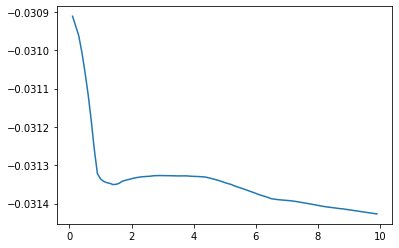

In [127]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_cross_val_scores = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_absolute_error')
print(np.mean(lasso_cross_val_scores))

alpha = []
error = []
for i in range(1, 100):
    alpha_i = i/10
    alpha.append(alpha_i)
    lasso_i = Lasso(alpha=alpha_i)
    error.append(np.mean(cross_val_score(lasso_i, X_train, y_train, scoring='neg_mean_absolute_error')))

plt.plot(alpha, error)

Given that our Lasso model has the smallest error term at alpha = 0, the lasso model isn't a good fit for our data. An alpha = 0 Lasso model is equivalent to ordinary least square and can be solved by the sklearn.LinearRegression model we used above.

In [137]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

np.mean(cross_val_score(random_forest, X_train, y_train, scoring='neg_mean_absolute_error'))

-0.023212276422764223

In [134]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10, 300, 10), 'criterion': ('mse', 'mae'), 'max_features': ('auto', 'sqrt', 'log2')}

grid_search = GridSearchCV(random_forest, parameters, scoring='neg_mean_absolute_error', cv=3)
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_estimator_)

KeyboardInterrupt: 

In [140]:
test_linear = linear_regression.predict(X_test)
test_lasso = lasso.predict(X_test)
test_random_forest = random_forest.predict(X_test)
# test_random_forest_tuned = grid_search.best_estimator_.predict(X_test)

In [142]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, test_linear))
print(mean_absolute_error(y_test, test_lasso))
print(mean_absolute_error(y_test, test_random_forest))
print(mean_absolute_error(y_test, (test_linear + test_random_forest) / 2))

0.02779823383858037
0.030482500441046664
0.022395772357723585
0.024133087648222223
